In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\katha\OneDrive\Documents\data\diabetes.csv")

In [2]:
data = pd.DataFrame(df)

In [3]:
data.keys()

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

## Step:3 Splitting data into train-test split

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
X = data[['preg','plas','pres','skin','insu','mass','pedi','age']]

In [6]:
y = data['class']

In [7]:
X = pd.DataFrame(X)

In [8]:
y = pd.DataFrame(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.75)

## Step: 4 & 5 Apply SVM on data without scaling it.

In [10]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

# fit the SVM model to the training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# predict the classes of the test data
y_pred = clf.predict(X_test)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Step 6 : Print accuracy and confusion matrix

In [11]:
# evaluate the performance of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

0.8020833333333334
[[117  13]
 [ 25  37]]


## Step 7 : Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler
#first fit then transform train data
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [13]:
scaled_train_data=scaler.transform(X_train)

In [14]:
#fit then transform test data
scaler.fit(X_test)
scaled_test_data=scaler.transform(X_test)

## Step 8 : feed model with standadize data

In [15]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

# fit the SVM model to the training data
clf = svm.SVC(kernel='linear')
clf.fit(scaled_train_data, y_train)

# predict the classes of the test data
y_pred1 = clf.predict(scaled_test_data)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# evaluate the performance of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

# Calculate the confusion matrix
conf_mat1 = confusion_matrix(y_test, y_pred1)
print(conf_mat1)

0.8072916666666666
[[117  13]
 [ 24  38]]


## Step 9 & 10 : Apply PCA on standardize data

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
#again fit and transform the scaled data
pca.fit(scaled_train_data)


PCA(n_components=3)

In [18]:
x_train_pca=pca.transform(scaled_train_data)

In [19]:
# do the same for test data
#fit and transform test data
pca.fit(scaled_test_data)
x_test_pca=pca.transform(scaled_test_data)

In [20]:
#check the dimensions
scaled_train_data.shape

(576, 8)

In [21]:
x_train_pca.shape

(576, 3)

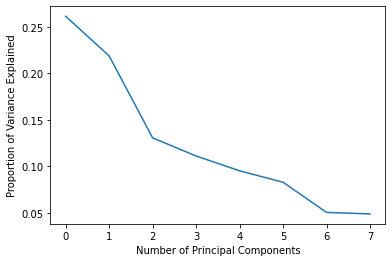

In [22]:
pca = PCA()
pca.fit(scaled_train_data)

# Generate the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### we have elbow point on 2 so we will check for higher accuracy from 2-5

## I think there is no need of repeating PCA steps again so I put n=2 and run the whole code again 

In [23]:
# Print the explained variance of each principal component
print("Explained Variance: ", pca.explained_variance_)

Explained Variance:  [2.09408303 1.75238616 1.04760973 0.89136434 0.76406938 0.66560372
 0.40582203 0.39297467]


In [24]:
# Print the sum of the explained variance
print("Sum of Explained Variance: ", pca.explained_variance_.sum())

Sum of Explained Variance:  8.013913043478265


In [25]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

# fit the SVM model to the training data
clf = svm.SVC(kernel='linear')
clf.fit(x_train_pca, y_train)

# predict the classes of the test data
y_pred2 = clf.predict(x_test_pca)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# evaluate the performance of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

# Calculate the confusion matrix
conf_mat2 = confusion_matrix(y_test, y_pred2)
print(conf_mat2)

0.7395833333333334
[[110  20]
 [ 30  32]]


## Step 11 : Apply LDA on standardize data

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply FDA to reduce dimensionality
lda = LDA(n_components= 1)
x_train_lda = lda.fit_transform(scaled_train_data , y_train)
x_test_lda = lda.fit_transform(scaled_test_data , y_test)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Step 12 : Feed model with standardize LDA data

In [28]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

# fit the SVM model to the training data
clf = svm.SVC(kernel='linear')
clf.fit(x_train_lda, y_train)

# predict the classes of the test data
y_pred3 = clf.predict(x_test_lda)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# evaluate the performance of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred3))

# Calculate the confusion matrix
conf_mat3 = confusion_matrix(y_test, y_pred3)
print(conf_mat3)

0.8072916666666666
[[116  14]
 [ 23  39]]


# Step 13: I have done in WORD 